# Goal:
The goal is to perform funnel analysis for an e-commerce website. 

Typically, websites have a clear path to conversion: for instance, you land on the home page, then you search, select a product, and buy it. At each of these steps, some users will drop oﬀ and leave the site. The sequence of pages that lead to conversion is called 'funnel'. 

Data Science can have a tremendous impact on funnel optimization. Funnel analysis allows to understand where/when our users abandon the website. It gives crucial insights on user behavior and on ways to improve the user experience. Also, it often allows to discover bugs.


# Challenge Description


You are looking at data from an e-commerce website. 
The site is very simple and has just 4 pages: 
* The ﬁrst page is the home page. When you come to the site for the ﬁrst time, you can only land on the home page as a ﬁrst page. 
* From the home page, the user can perform a search and land on the search page. 
* From the search page, if the user clicks on a product, she will get to the payment page, where she is asked to provide payment information in order to buy that product. 
* If she does decide to buy, she ends up on the conﬁrmation page

The company CEO isn't very happy with the olue o sales and, especially, o sales coming from new users. Therefore, she asked you to investigate whether there is something wrong in the conversion funnel or, in general, if you could suggest how conversion rate can be improved. 

Speciﬁcally, she is interested in :
* A full picture of funnel conversion rate for both desktop and mobile 
* Some insights on what the product team should focus on in order to improve conversion rate as well as anything you might discover that could help improve conversion rate. 

## Load Data Set
All the tables refer to only the user ﬁrst experience on the site. 

1. "user_table" - info about the user 
2. "home_page_table" - Users who landed on the home page
3. "search_page_table" - Users who landed on the search_page
4. "payment_page_table" - Users who landed on the payment_page
5. "payment_confirmation_table" - Users who landed on the payment_confirmation_table. That is, these are the users who bought the product


In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
user=pd.read_csv('user_table.csv')
home_page=pd.read_csv('home_page_table.csv')
search_page=pd.read_csv('search_page_table.csv')
payment_page=pd.read_csv('payment_page_table.csv')
payment_confirmation=pd.read_csv('payment_confirmation_table.csv')

In [3]:
user.head()

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [4]:
home_page.head()

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [5]:
result = pd.merge(user,home_page,on='user_id', how='left')

In [6]:
## check the uniqueness of user_id in user_table
user.user_id.is_unique

True

In [7]:
## check the uniqueness of user_id in home_page_table
home_page.user_id.is_unique

True

In [8]:
len(user)==len(home_page)
result.isnull().sum()

user_id    0
date       0
device     0
sex        0
page       0
dtype: int64

## Data Processing

#### After left join the user_table and home_page_table, we can find that everyone lands on the home page in the first time.

In [9]:
result1=pd.merge(result,search_page,on='user_id', how='left')

In [10]:
result1.head()

,user_id,date,device,sex,page_x,page_y
0,450007,2015-02-28,Desktop,Female,home_page,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page
3,190794,2015-02-18,Desktop,Female,home_page,search_page
4,537909,2015-01-15,Desktop,Male,home_page,NaN


In [11]:
percent_homepage_to_search=result1.page_y.isnull().sum()/len(result1)
print("percent_home_page_retention_to_search_page: {}".format(percent_homepage_to_search))


percent_home_page_retention_to_search_page: 0.5


#### From the home page, only half percent of users perform a search and land on the search page.

In [12]:
result2=pd.merge(result1,payment_page,on='user_id', how='left')

In [13]:
result2 = result2.rename(columns={'page_x': 'home_page', 'page_y': 'search_page','page': 'payment_page'})

In [73]:
result2.head()

,user_id,date,device,sex,home_page,search_page,payment_page
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN


In [14]:
retention=1-result2.payment_page.isnull().sum()/len(result2)
print("percent_home_page_retention_to_payment_page:{}".format(retention))
print("search_page_retention_to_payment_page:{}".format(retention/percent_homepage_to_search))

percent_home_page_retention_to_payment_page:0.0667035398230088
search_page_retention_to_payment_page:0.1334070796460176


#### From the search page, only 13.3% of users will get to the payment page. And only 6.67% of users from the home page to payment page.

In [15]:
result3=pd.merge(result2,payment_confirmation,on='user_id', how='left')

In [16]:
result3.head()

,user_id,date,device,sex,home_page,search_page,payment_page,page
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [17]:
result3 = result3.rename(columns={'page': 'payment_confirm_page'})

In [18]:
result3.head()

,user_id,date,device,sex,home_page,search_page,payment_page,payment_confirm_page
0,450007,2015-02-28,Desktop,Female,home_page,NaN,NaN,NaN
1,756838,2015-01-13,Desktop,Male,home_page,NaN,NaN,NaN
2,568983,2015-04-09,Desktop,Male,home_page,search_page,NaN,NaN
3,190794,2015-02-18,Desktop,Female,home_page,search_page,NaN,NaN
4,537909,2015-01-15,Desktop,Male,home_page,NaN,NaN,NaN


In [32]:
purchase_rate=1-result3.payment_confirm_page.isnull().sum()/len(result3)
print("percent_home_page_retention_to_payment_confirm_page:{}".format(purchase_rate))
print("payment_page_retention_to_payment_confirm_page:{}".format(purchase_rate/retention))

percent_home_page_retention_to_payment_confirm_page:0.0050000000000000044
payment_page_retention_to_payment_confirm_page:0.07495854063018254


## Funnel conversion rate for both desktop and mobile

In [43]:
null_columns=result3.columns[result3.isnull().any()]
rate=1-result3[null_columns].isnull().sum()/len(result3)
df = pd.DataFrame({'Page':rate.index,'Retention_Rate':rate.values})
df

,Page,Retention_Rate
0,search_page,0.500000
1,payment_page,0.066704
2,payment_confirm_page,0.005000


Text(0,0.5,'rate')

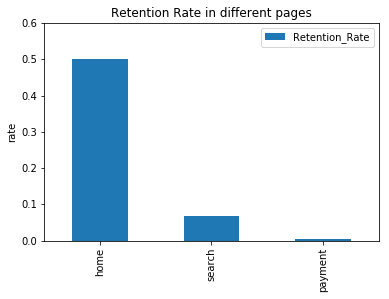

In [56]:
labels=['home','search','payment']
df.plot(kind='bar')
plt.title('Retention Rate in different pages')
plt.xticks([0, 1, 2], ['home', 'search', 'payment'])
plt.margins(0.2)
plt.ylabel('rate')

In [91]:
len(result3)

90400

In [90]:
null_columns=result3.columns[result3.isnull().any()]
len(result3)-result3[null_columns].isnull().sum()

search_page             45200
payment_page             6030
payment_confirm_page      452
dtype: int64

In [98]:
import plotly.plotly as py
import plotly
plotly.tools.set_credentials_file(username='blanchey218', api_key='spOLicK2NCcfzy5dCA46')
from plotly import graph_objs as go

from __future__ import division

# chart stages data
values = [90400, 45200, 6030, 452]
phases = ['Visit', 'search', 'payment', 'Purchase']

# color of each funnel section
colors = ['rgb(32,155,160)', 'rgb(253,93,124)', 'rgb(28,119,139)', 'rgb(182,231,235)']

n_phase = len(phases)
plot_width = 400

# height of a section and difference between sections 
section_h = 100
section_d = 10

# multiplication factor to calculate the width of other sections
unit_width = plot_width / max(values)

# width of each funnel section relative to the plot width
phase_w = [int(value * unit_width) for value in values]

# plot height based on the number of sections and the gap in between them
height = section_h * n_phase + section_d * (n_phase - 1)
shapes = []

# list containing the Y-axis location for each section's name and value text
label_y = []

for i in range(n_phase):
        if (i == n_phase-1):
                points = [phase_w[i] / 2, height, phase_w[i] / 2, height - section_h]
        else:
                points = [phase_w[i] / 2, height, phase_w[i+1] / 2, height - section_h]

        path = 'M {0} {1} L {2} {3} L -{2} {3} L -{0} {1} Z'.format(*points)

        shape = {
                'type': 'path',
                'path': path,
                'fillcolor': colors[i],
                'line': {
                    'width': 1,
                    'color': colors[i]
                }
        }
        shapes.append(shape)
        
        # Y-axis location for this section's details (text)
        label_y.append(height - (section_h / 2))

        height = height - (section_h + section_d)
        # For phase names
label_trace = go.Scatter(
    x=[-350]*n_phase,
    y=label_y,
    mode='text',
    text=phases,
    textfont=dict(
        color='rgb(200,200,200)',
        size=15
    )
)
 
# For phase values
value_trace = go.Scatter(
    x=[350]*n_phase,
    y=label_y,
    mode='text',
    text=values,
    textfont=dict(
        color='rgb(200,200,200)',
        size=15
    )
)

data = [label_trace, value_trace]
 
layout = go.Layout(
    title="<b>Funnel Chart</b>",
    titlefont=dict(
        size=20,
        color='rgb(203,203,203)'
    ),
    shapes=shapes,
    height=560,
    width=800,
    showlegend=False,
    paper_bgcolor='rgba(44,58,71,1)',
    plot_bgcolor='rgba(44,58,71,1)',
    xaxis=dict(
        showticklabels=False,
        zeroline=False,
    ),
    yaxis=dict(
        showticklabels=False,
        zeroline=False
    )
)
 
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~blanchey218/0 or inside your plot.ly account where it is named 'plot from API'


## Some Insights:
what the product team should focus on in order to improve conversion rate as well as anything you might discover that could help improve conversion rate.

### Conversion of Different Device Contrast:
The conversion rate of mobile is higher than desktop.


In [109]:
Desktop=result3.groupby('device').get_group('Desktop')
Desktop_rate=1-Desktop[null_columns].isnull().sum()/len(Desktop)
df1 = pd.DataFrame({'Page':Desktop_rate.index,'Retention_Rate':Desktop_rate.values})
df1

,Page,Retention_Rate
0,search_page,0.500000
1,payment_page,0.050000
2,payment_confirm_page,0.002492


In [110]:
Mobile=result3.groupby('device').get_group('Mobile')
Mobile.columns[Mobile.isnull().any()]
Mobile_rate=1-Mobile[null_columns].isnull().sum()/len(Mobile)
df2 = pd.DataFrame({'Page':Mobile_rate.index,'Retention_Rate':Mobile_rate.values})
df2

,Page,Retention_Rate
0,search_page,0.50
1,payment_page,0.10
2,payment_confirm_page,0.01


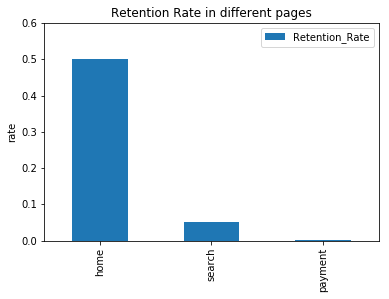

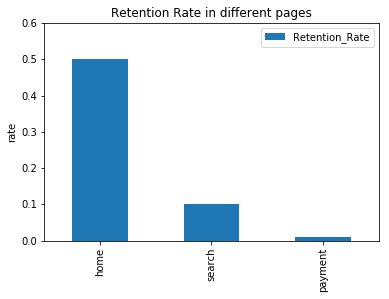

In [114]:
df1.plot(kind='bar')
plt.title('Retention Rate in different pages')
plt.xticks([0, 1, 2], ['home', 'search', 'payment'])
plt.margins(0.2)
plt.ylabel('rate')
plt.show()
df2.plot(kind='bar')
plt.title('Retention Rate in different pages')
plt.xticks([0, 1, 2], ['home', 'search', 'payment'])
plt.margins(0.2)
plt.ylabel('rate')
plt.show()

### Conversion Difference between  Female and Male:


In [123]:
Male=result3.groupby('sex').get_group('Male')
Male_rate=1-Male[null_columns].isnull().sum()/len(Male)
df1 = pd.DataFrame({'Page':Male_rate.index,'Retention_Rate':Male_rate.values})
Female=result3.groupby('sex').get_group('Female')
Female_rate=1-Female[null_columns].isnull().sum()/len(Female)
df2 = pd.DataFrame({'Page':Female_rate.index,'Retention_Rate':Female_rate.values})

Conversion_Sex=pd.merge(df1,df2,on='Page', how='left')
Conversion_Sex = Conversion_Sex.rename(columns={'Retention_Rate_x': 'Male','Retention_Rate_y': 'Female'})
Conversion_Sex

,Page,Male,Female
0,search_page,0.496944,0.503073
1,payment_page,0.064644,0.068774
2,payment_confirm_page,0.004655,0.005347


C:\Users\blanc\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



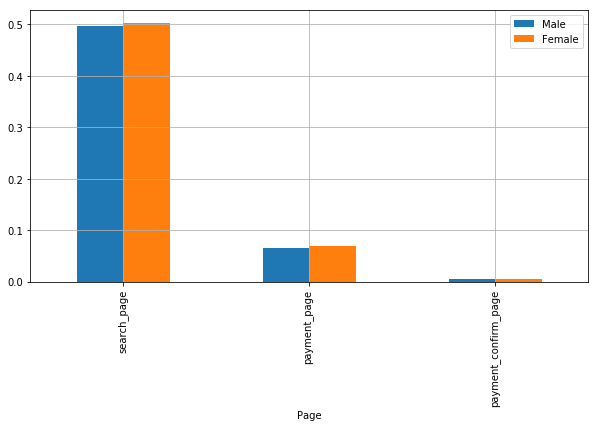

In [131]:
Conversion_Sex.plot(kind='bar',x='Page', y=['Male', 'Female'], figsize=(10,5), grid=True)

From the analysis, we can see that 
1. Users in the Desktop follow different paths to conversion with users in Mobile. Mobile users have a higher conversion rate than desktop users.
2. Female users convert faster than male users. 